# Solving the mean-field α-Ω dynamo equations in the kinematic regime.

## Solving for $ B_r $ and $ B_\phi $

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.special import iv,kve,kv #provides module to compute modified bessel function of 1st kind
import numpy as np

In [2]:
#constants and paramters

eta_t = 0.5 # η_T estimated as η_t because η is microscopic
h_0=1 #typical disk scale in Mpc
t_0 = (h_0**2)/eta_t
#Omega = 1/t_0 #Omega has units of 1/t0
#Alpha = h/t_0 #Alpha has units of h0/t0
q = 1

#Omega(r) for Brandt Rotation Curve
def Omega(r):
    Omega_0 = 130 #in km/s/kpc
    r_Om = 2 #in kpc
    return Omega_0/((1+(r/r_Om)**2)**0.5)

def h(r):
    h_D = 0.35 #in kpc
    r_D = 10 #in kpc
    return h_D*(1+(r/r_D)**2)**0.5

def Alpha(r):
    tau = 10 #in Myr
    vrms = 10 #in km/s
    return (tau**2)*(vrms**2)*Omega(r)/h(r)

In [3]:
#GRID PARAMETERS

# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Total time (in Myr)
Nt = 500 #Total time steps
dt = T / Nt

In [4]:
def boundary_condition(Br, B_phi):
    Br[0, :] = 0
    B_phi[0, :] = 0
    Br[Nr, :] = 0
    B_phi[Nr, :] = 0

In [5]:
#Using numpy's gradient function which itself uses a central differencing method
def FDM_r(R,Br,B_phi):
    h_0=h(R)
    alpha = Alpha(R)
    return np.gradient((1/R)*np.gradient(R*Br, dr), dr) - ((np.pi)**2)*Br/(4*h_0**2) - 2*alpha*B_phi/(np.pi*h_0)

def FDM_phi(R,B_r,B_phi):
    h_0=h(R)
    omega = Omega(R)
    return np.gradient((1/R)*np.gradient(R*B_phi, dr), dr) - ((np.pi)**2)*B_phi/(4*h_0**2) - q*omega*Br

In [6]:
def RK4(R,Br,B_phi):
    k1_r = dt * eta_t * FDM_r(R,Br,B_phi)
    k1_phi = dt * eta_t * FDM_phi(R,Br,B_phi)
    
    k2_r = dt * eta_t * FDM_r(R + 0.5*k1_r,Br + 0.5 * k1_r,B_phi + 0.5*k1_phi)
    k2_phi = dt * eta_t * FDM_phi(R + 0.5*k1_phi,Br + 0.5 * k1_r,B_phi + 0.5*k1_phi)
    
    k3_r = dt * eta_t * FDM_r(R + 0.5*k2_r,Br + 0.5 * k2_r,B_phi + 0.5*k2_phi)
    k3_phi = dt * eta_t * FDM_phi(R + 0.5*k2_phi,Br + 0.5 * k2_r,B_phi + 0.5*k2_phi)
    
    k4_r = dt * eta_t * FDM_r(R + k3_r,Br + k3_r,B_phi + k3_phi)
    k4_phi = dt * eta_t * FDM_phi(R + k3_phi,Br + k3_r,B_phi + k3_phi)
    
    Br_next = Br + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    B_phi_next = B_phi + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6
    
    return Br_next, B_phi_next

In [7]:
# Initializing radial component of Br using different seed fields
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((2* np.pi * R)/R_max)
#Br = np.exp(-R/R_max)
#Br = np.tanh(R/R_max)
#shape = np.shape(R)
#Br = np.random.randint(1,5,*shape)

#Initialising the B_phi field
B_phi = np.cos((2 * np.pi * R)/R_max)
#B_phi = np.exp(R/R_max)h_0
#B_phi = np.tanh(-R/R_max)
#B_phi = np.random.randint(1,5,*shape)

In [8]:
# EVOLUTION OF Br and B_phi
# Store the evolution of magnetic field at different radial positions
Br_evolution = np.zeros((Nt + 1, Nr))
B_phi_evolution = np.zeros((Nt + 1, Nr))

#imposing vacuum boundary conditions
boundary_condition(Br_evolution, B_phi_evolution)

#boundary_conditions2(Br_evolution)
# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    Br_evolution[t, :] = np.copy(Br)
    B_phi_evolution[t, :] = np.copy(B_phi)
    Br, B_phi = RK4(R,Br,B_phi)

/tmp/ipykernel_9241/2085948018.py:19: RuntimeWarning: overflow encountered in square
  return h_D*(1+(r/r_D)**2)**0.5
/tmp/ipykernel_9241/2085948018.py:14: RuntimeWarning: overflow encountered in square
  return Omega_0/((1+(r/r_Om)**2)**0.5)
/tmp/ipykernel_9241/3308425213.py:5: RuntimeWarning: overflow encountered in multiply
  return np.gradient((1/R)*np.gradient(R*Br, dr), dr) - ((np.pi)**2)*Br/(4*h_0**2) - 2*alpha*B_phi/(np.pi*h_0)
/home/upasana/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:1235: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/tmp/ipykernel_9241/3308425213.py:10: RuntimeWarning: overflow encountered in multiply
  return np.gradient((1/R)*np.gradient(R*B_phi, dr), dr) - ((np.pi)**2)*B_phi/(4*h_0**2) - q*omega*Br
/tmp/ipykernel_9241/3308425213.py:5: RuntimeWarning: invalid value encountered in divide
  return np.gradient((1/R)*np.gradient(R*Br, dr), dr) - ((np.pi)**

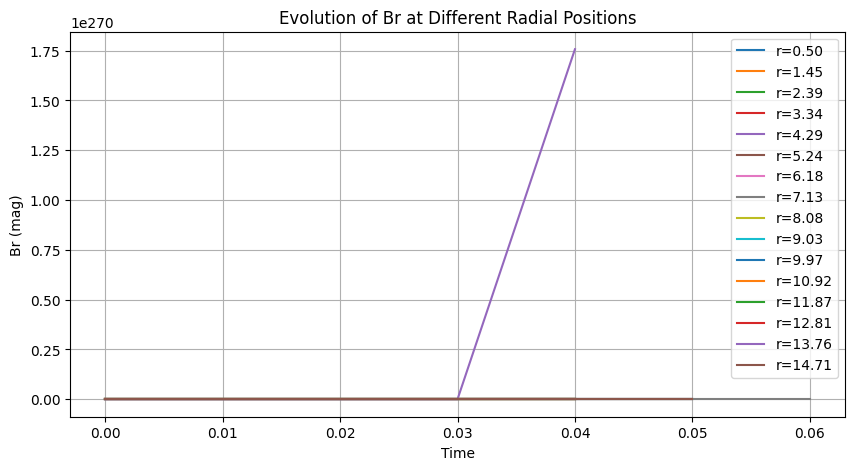

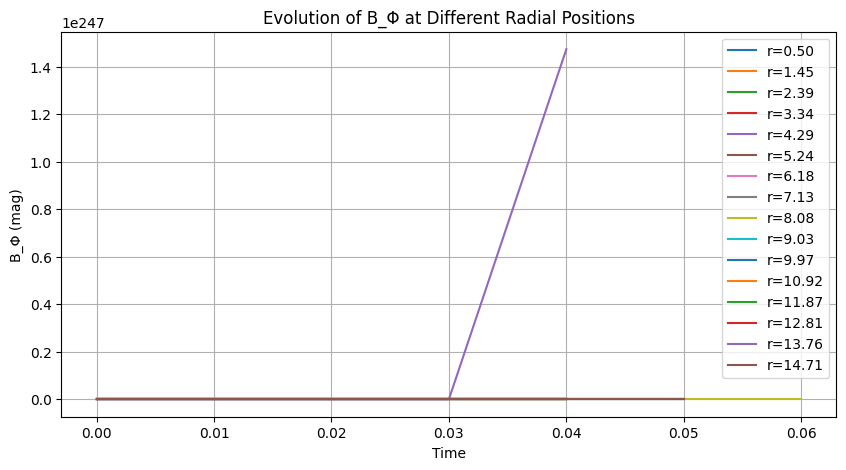

In [9]:
# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, T, Nt + 1),np.abs(Br_evolution[:, ::Nr//15]))
plt.xlabel('Time')
plt.ylabel('Br (mag)')
plt.title('Evolution of Br at Different Radial Positions')
plt.legend([f'r={R[i]:.2f}' for i in range(0, Nr, Nr//15)])
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, T, Nt + 1),np.abs(B_phi_evolution[:, ::Nr//15]),label="Evolution curve for B_phi")

plt.xlabel('Time')
plt.ylabel('B_Φ (mag)')
plt.title('Evolution of B_Φ at Different Radial Positions')
plt.legend([f'r={R[i]:.2f}' for i in range(0, Nr, Nr//15)])
plt.grid()
plt.show()

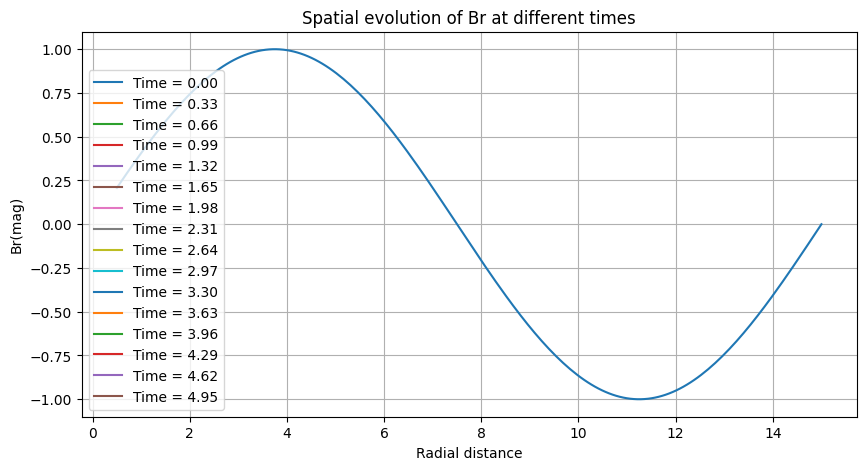

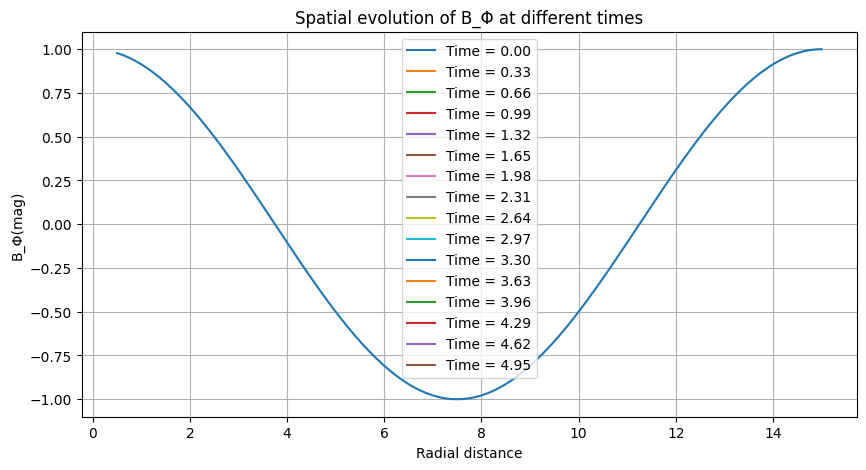

In [10]:
#Spatial evolution at certain times
plt.figure(figsize=(10, 5))
for t in range(0, Nt + 1, Nt // 15):  
    plt.plot(R, Br_evolution[t, :], label=f'Time = {t * dt:.2f}')
plt.ylabel("Br(mag)")
plt.xlabel("Radial distance")
plt.title("Spatial evolution of Br at different times")
plt.legend()
plt.grid()
plt.show()

#Spatial evolution at certain times
plt.figure(figsize=(10, 5))
for t in range(0, Nt + 1, Nt // 15):  
    plt.plot(R, B_phi_evolution[t, :], label=f'Time = {t * dt:.2f}')
plt.ylabel("B_Φ(mag)")
plt.xlabel("Radial distance")
plt.title("Spatial evolution of B_Φ at different times")
plt.legend()
plt.grid()
plt.show()